# Анализ рынка компьютерных игр

## Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.    
Перед нами данные до 2016 года, мы планируем кампанию на 2017 год. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы долларов)
- *EU_sales* — продажи в Европе (миллионы долларов)
- *JP_sales* — продажи в Японии (миллионы долларов)
- *Other_sales* — продажи в других странах (миллионы долларов)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План

1. Файл с данными. Общая информация.
2. Подготовка данных.
    - Заменить названия столбцов.
    - Привести данные к нужным типам.
    - Обработать пропуски.
    - Посчитать суммарные продажи для каждого региона.
3. Исследовательский анализ данных. 
    - Посчитать количество выпускаемых игр в зависимости от года.
    - Отобрать только актуальные данные, которые помогут построить прогноз на 2017 год.
    - Определить, как менялись продажи по платформам. Отобрать самые прибыльные платформы.
    - Построить графики по глобальным продажам каждой игры и разбивкой по платформам. 
    - Отследить влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. Соотнести результаты с продажами игр на других платформах.
    - Проанализировать распределение игр по жанрам.
4. Определите для пользователя каждого региона (NA, EU, JP):
    - самые популярные платформы (топ-5);
    - самые популярные жанры (топ-5); 
    - степень влияния рейтинга ESRB на продажи.
5. Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports.
6. Выводы.


## 1. Файл с данными

In [1]:
#Импорт библиотек
import pandas as pd
import math
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

In [2]:
#Импорт файла с данными
df_games=pd.read_csv('/datasets/games.csv')

In [3]:
#Обзор данных
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В базе 16715 наблюдений. 11 столбцов: действительные числа (6) и текстовые (5). В 6-ти переменных есть пропуски. 

## 2. Подготовка данных

### Названия столбцов

In [5]:
#Названия столбцов к нижнему регистру
df_games.columns=df_games.columns.str.lower()
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Два пропуска в колонке "name". Похоже на ошибки в данных. Посмотрим на эти строки. 

In [6]:
#Строки с пропусками в названии игры
df_games[df_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Очень старые данные, возможно, проблема в этом. Эти данные для прогноза мы в любом случае использовать не будем. Таких строк всего две, удалим их.

In [7]:
#Удаление строк с пропусками в названии игры
df_games.dropna(subset=['name'], inplace=True)
print("Количество строк с пропусками в колонке 'name':", df_games['name'].isnull().sum())

Количество строк с пропусками в колонке 'name': 0


In [8]:
print("Количество строк с пропусками в колонке 'year_of_release':", df_games['year_of_release'].isnull().sum())

Количество строк с пропусками в колонке 'year_of_release': 269


269 пропусков в столбце "год выпуска", это 1.6% выборки. Возможно, проблема в том, что это старые данные. Так как в работе мы будем исследовать только актуальные данные, мы не сможем использовать эти строки, т.к. нет уверенности в их сроке давности. Удалим их. 

In [9]:
#Удаление строк с пропусками в годах выпуска
df_games.dropna(subset=['year_of_release'], inplace=True)
print("Количество строк с пропусками в колонке 'year_of_release':", df_games['year_of_release'].isnull().sum())

Количество строк с пропусками в колонке 'year_of_release': 0


In [10]:
#Пропуски в отзывах
print("Количество строк с пропусками в колонке 'critic_score':", df_games['critic_score'].isnull().sum())
print("Количество строк с пропусками в колонке 'user_score':", df_games['user_score'].isnull().sum())

Количество строк с пропусками в колонке 'critic_score': 8461
Количество строк с пропусками в колонке 'user_score': 6605


Много строк с пропусками в отзывах критиков и пользователей. Скорее всего, это связано с отсутствием отзывов в источниках данных, по которым формировались оценки. Оставим пропуски. 

In [11]:
#Пропуски в рейтинге ESRB
print("Количество строк с пропусками в колонке 'rating':", df_games['rating'].isnull().sum())

Количество строк с пропусками в колонке 'rating': 6676


Большое количество пропусков в рейтинге ESRB может быть связано с тем, что не всем играм был присвоен рейтинг. Оставим пропуски. 

In [12]:
#Обзор данных после удаления пропусков
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Устранение ошибок

В столбце с рейтингом пользователей примутствует значение 'tbd' - to be determined. То есть рейтинг еще не определен. Заменим эти значения на пропуски.

In [13]:
print("Количество строк с tbd в колонке'user_score':", df_games[df_games['user_score']=='tbd']['user_score'].count())

Количество строк с tbd в колонке'user_score': 2376


In [14]:
#Замена значений tdb на пропуски
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

In [15]:
print("Количество строк с tbd в колонке'user_score':", df_games[df_games['user_score']=='tbd']['user_score'].count())

Количество строк с tbd в колонке'user_score': 0


### Типы переменных

Теперь преобразуем тип данных в переменной 'user_score' в действительные числа.

In [16]:
df_games['user_score']=df_games['user_score'].astype('float')

In [17]:
#Обзор данных после корректировок
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Проверка на выбросы

Проверим отсутствие нетипичных значений, связанных с некорректными данными.

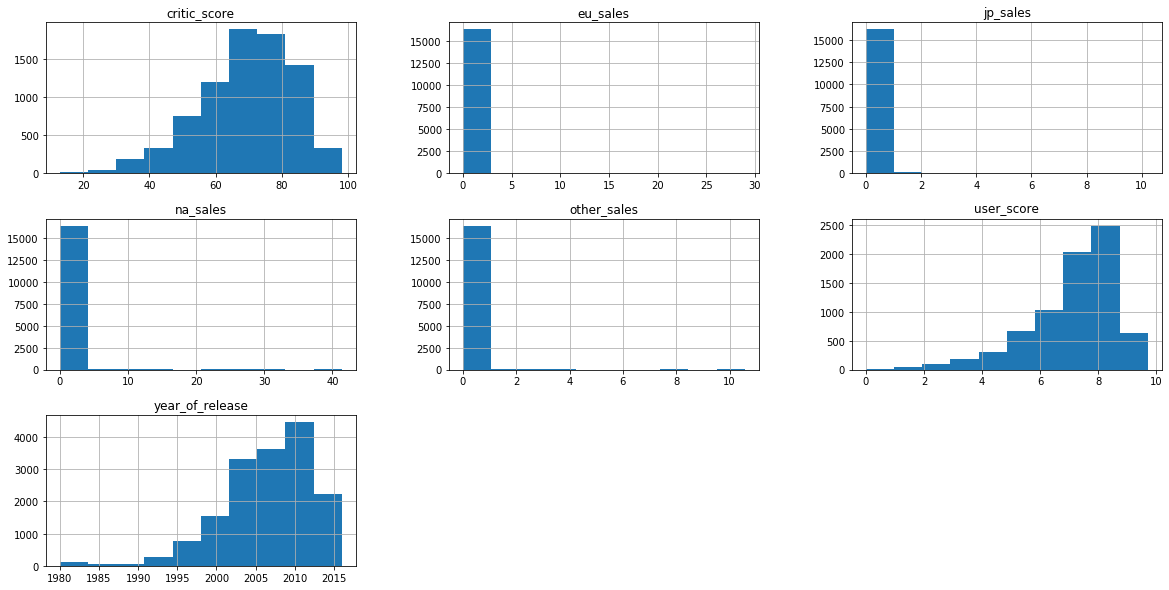

In [18]:
df_games.hist(figsize=(20,10))
plt.show()

Значения корректны в своих диапазонах.

In [19]:
#Проверка значений столбца rating ESRB
df_games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

- E - Everyone
- T - Teen
- M - Mature 17+
- E10+ - Everyone 10+
- EC - Early childhood
- AO - Adults Only 18+
- K-A - Kids to adults
- RP - Rating Pending

RP (в ожидании рейтинга) заменим на пропущенное значение. В категориях EC, K-A, AO крайне мало наблюдений. Такие данные не будут являться показательными при анализе зависимости каких-либо параметров от рейтинга. Заменим их тоже на пропущенные значения, чтоб потом не ошибиться в выводах.

In [20]:
#Замена значений RP, EC, K-A, AO на пропуски
df_games['rating'] = df_games['rating'].replace(['RP', 'EC', 'K-A', 'AO'], np.nan)

#Проверка значений столбца rating ESRB
df_games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

### Суммарные продажи во всех регионах

In [21]:
#Добавление столбца с суммарными продажами
df_games['sales']=df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']

In [22]:
df_games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


# 3. Исследовательский анализ данных

### Выпуск игр по годам

Посмотрим, сколько игр выпускалось в разные годы. 

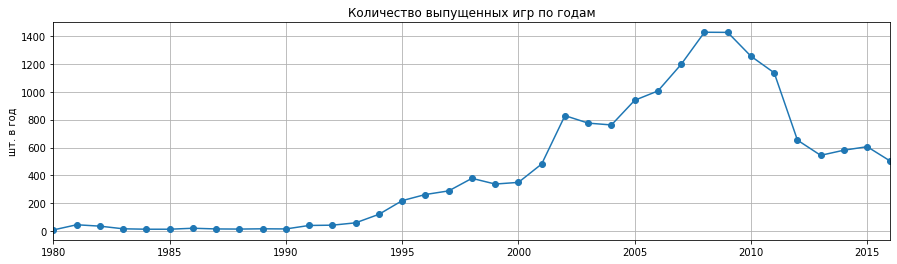

In [23]:
years_games=df_games.groupby('year_of_release')['name'].count()
years_games.plot(figsize=(15,4), style='o-', grid=True)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('')
plt.ylabel('шт. в год')
plt.show()

До 1995 года количество выпущенных игр крайне мало. Затем наблюдается восходящий тренд. Самое большое число игр представлено в 2008-2009 годах. После этого тенденция к снижению. 

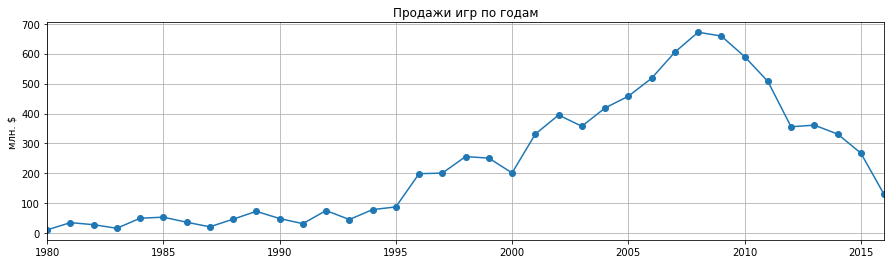

In [24]:
years_games=df_games.groupby('year_of_release')['sales'].sum()
years_games.plot(figsize=(15,4), style='o-', grid=True)
plt.title('Продажи игр по годам')
plt.xlabel('')
plt.ylabel('млн. $')
plt.show()

График похож на предыдущий. До 2008 года общий тренд восходящий с отдельными аномалиями, после 2008 суммарные продажи снижаются.

### Популярность платформ по годам

Посмотрим, как менялись продажи по платформам.

In [25]:
#10 самых продаваемых платформ
platforms_games=df_games.groupby(['platform'])['sales'].sum().sort_values(ascending=False).head(10)
platforms_games

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sales, dtype: float64

In [26]:
#выборка для 10 самых продаваемых платформ
df_games_topPlatform=df_games[(df_games['platform']=='PS2')|(df_games['platform']=='X360')|(df_games['platform']=='PS3')|(df_games['platform']=='Wii')
                 |(df_games['platform']=='DS')|(df_games['platform']=='PS')|(df_games['platform']=='PS4')|(df_games['platform']=='GBA')
                 |(df_games['platform']=='PSP')|(df_games['platform']=='3DS')]

In [27]:
#сводная таблица продаж платформ по годам
pivot_platform_year=df_games_topPlatform.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')

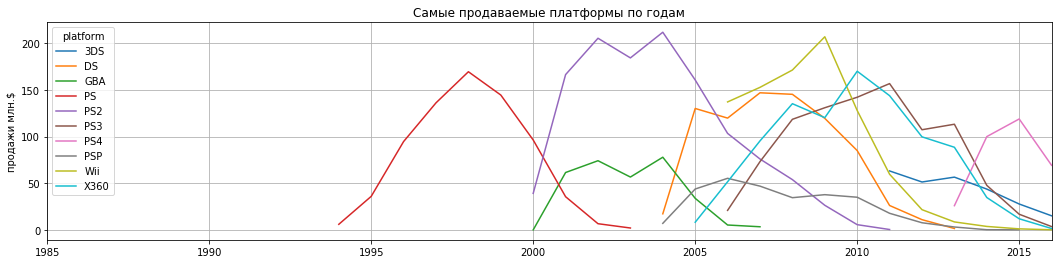

In [28]:
#график продаж платформ по годам
pivot_platform_year.plot(figsize=(18,4), style='-', grid=True)
plt.title('Самые продаваемые платформы по годам')
plt.xlabel('')
plt.ylabel('продажи млн.$')
plt.show()

На графике видно, что жизненный цикл платформ до 10 лет. Самые популярные платформы сменяют друг друга с периодичностью примерно в 5 лет. 

### Определение актуального периода

С одной стороны, мы увидели, что тенденции в игровой индустрии меняются примерно каждые 5-7 лет. С другой стороны, на графике продаж по годам видно, что убывающий тренд по продажам сохраняется с 2008 года. Возьмем данные за последние 5 полных лет. 

In [29]:
#данные после 2010 года
df_games=df_games[df_games['year_of_release']>2010]

In [30]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
name               4022 non-null object
platform           4022 non-null object
year_of_release    4022 non-null float64
genre              4022 non-null object
na_sales           4022 non-null float64
eu_sales           4022 non-null float64
jp_sales           4022 non-null float64
other_sales        4022 non-null float64
critic_score       1812 non-null float64
user_score         2032 non-null float64
rating             2312 non-null object
sales              4022 non-null float64
dtypes: float64(8), object(4)
memory usage: 408.5+ KB


Неактуальные данные отсекаем.

### Самые продаваемые платформы

In [31]:
# 10 самых продаваемых платформ за последние 5 лет
platforms_sales=df_games.groupby(['platform'])['sales'].sum().sort_values(ascending=False).head(10)
platforms_sales

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
Name: sales, dtype: float64

Для актуальных данных топ 10 самых продаваемых платформ немного изменились, по сравнению с первоначальной выборкой.

In [32]:
#выборка для 10 самых продаваемых платформ
df_sales_topPlatform=df_games[(df_games['platform']=='PS3')|(df_games['platform']=='X360')|(df_games['platform']=='Wii')|(df_games['platform']=='DS')
                 |(df_games['platform']=='PS4')|(df_games['platform']=='3DS')|(df_games['platform']=='XOne')|(df_games['platform']=='PC')
                 |(df_games['platform']=='PSV')|(df_games['platform']=='WiiU')]

In [33]:
#Сводная таблица
pivot_platform_year=df_sales_topPlatform.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')

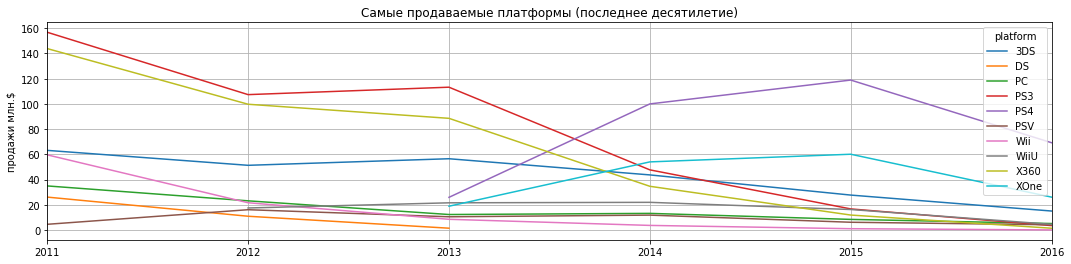

In [34]:
#график продаж платформ по годам
pivot_platform_year.plot(figsize=(18,4), style='-', grid=True)
plt.title('Самые продаваемые платформы (последнее десятилетие)')
plt.xlabel('')
plt.ylabel('продажи млн.$')
plt.show()

Последние 3 года самой популярной платформой является PS4, на втором месте XOne. Направление тренда у них одинаковое, и уже наблюдается тенденция к снижению.  

До этого двумя самыми популярными платформами были PS3 и Х360. Продажи по ним в конце периода уже стремяться к нулю.

На третьем месте остается 3DS (в течение 5 лет).

Как потенциально прибыльные выбираем PS4, XOne, 3DS. Однако согласно цикличности графика, скорее всего, в скором времени появятся новые платформы лидеры. Но на данный момент у нас только эти данные.

Именно эти платформы мы и можем назвать перспективными на 2017 год. Данные за 2016 год могут быть неполными. Соответсвенно, если рассматривать весь год, то провала может и не быть.

### Ящик с усами по Глобальным продажам каждой игры с разбивкой на платформы

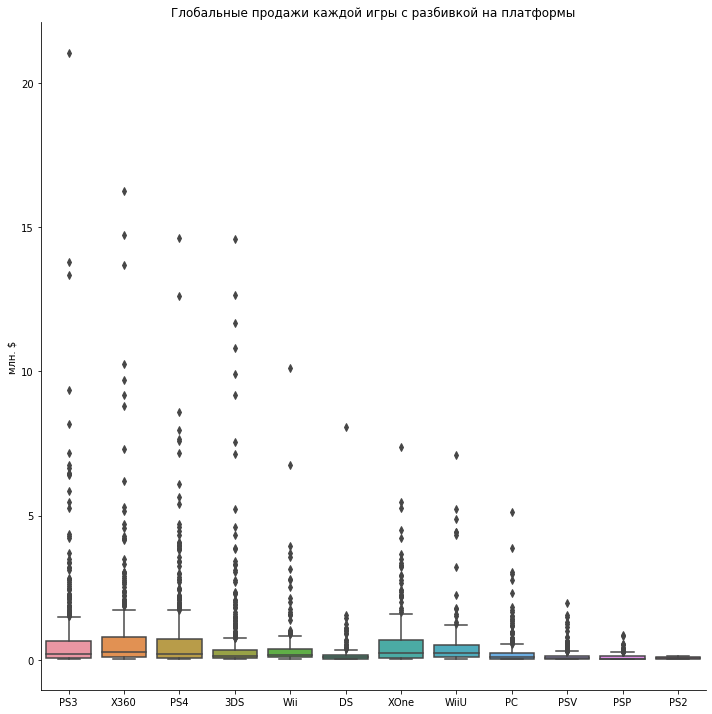

In [35]:
#График Ящик с усами
import seaborn as sns

sns.catplot(x='platform', y='sales', data=df_games, kind='box', height=10)
plt.title('Глобальные продажи каждой игры с разбивкой на платформы')
plt.xlabel('')
plt.ylabel('млн. $')
plt.show()

Как видно на графике, разница в продажах на разных платформах присутствует. На половине платформ отдельные игры не собирают более 8 млн. Однако есть три платформы (по суммарным продажам они тоже лидируют), на которых продажи отдельных игр имеют аномально большие значения. Для Х360, PS4, 3DS - это отметка в 17 млн. На лидирующей платформе PS2 значения достигают 22 млн.  

Чтоб лучше рассмотреть медианные значения, построим увеличенный график.

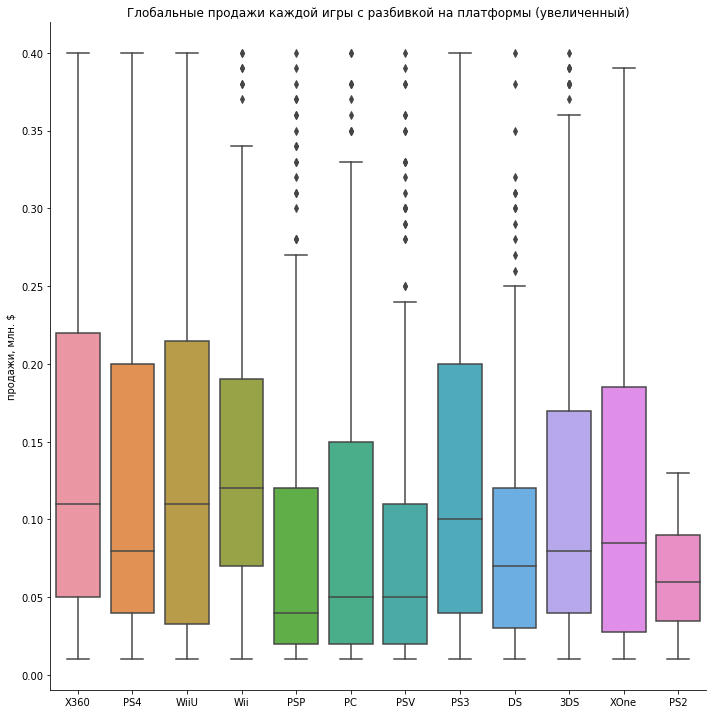

In [36]:
#График Ящик с усами увеличенный
actual_box=df_games.loc[df_games['sales']<df_games['sales'].quantile(.75)]

sns.catplot(x='platform', y='sales', data=actual_box, kind='box', height=10)
plt.title('Глобальные продажи каждой игры с разбивкой на платформы (увеличенный)')
plt.xlabel('')
plt.ylabel('продажи, млн. $')
plt.show()

На увеличенном графике видно, что типичные значения на платформах все таки не превышают 0,4 млн. 50 процентов значений вокруг медиан расположены в диапазоне от 0.02 до 0.23 млн.

### Влияние отзывов на продажи на самой популярной платформе

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для анализа выбираем прибыльную платформу PS4.

In [37]:
#Выборка для RS4
df_games_PS4=df_games[df_games['platform']=='PS4']

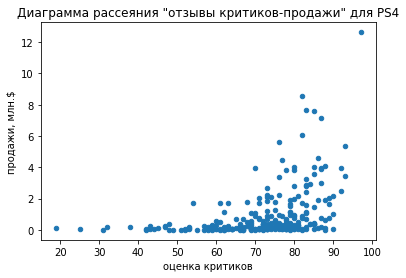

Коэфф.корр. между отзывами критиков и продажами: 0.406567902061781


In [38]:
#Диаграмма рассеяния "отзывы критиков-продажи" для PS4
df_games_PS4.plot(x='critic_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния "отзывы критиков-продажи" для PS4')
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн.$')
plt.show()

print('Коэфф.корр. между отзывами критиков и продажами:', df_games_PS4['sales'].corr(df_games_PS4['critic_score']))

На графике наблюдается положительная зависимость.

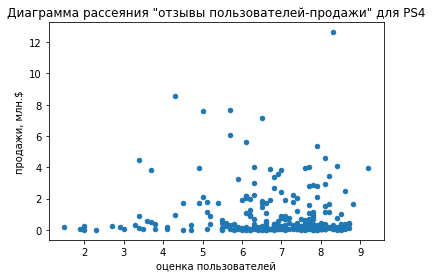

Коэфф.корр. между отзывами пользователей и продажами: -0.031957110204556424


In [39]:
#Диаграмма рассеяния "отзывы пользователей-продажи" для PS4
df_games_PS4.plot(x='user_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния "отзывы пользователей-продажи" для PS4')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн.$')
plt.show()

print('Коэфф.корр. между отзывами пользователей и продажами:', df_games_PS4['sales'].corr(df_games_PS4['user_score']))

Явную зависимость на графике отследить сложно.

Таким образом на популярной платформе PS4 есть явная корреляция между отзывами критиков и продажами, и она положительная. Корреляция между отзывами пользователей и продажами близка к 0, зависимость не прослеживается.

### Влияние отзывов на продажи на других платформах

Проверим зависимости еще для двух прибыльных платформ, а затем сравним с результатами для полной актуальной выборки.

In [40]:
#Выборка для XOne
df_games_XOne=df_games[df_games['platform']=='XOne']

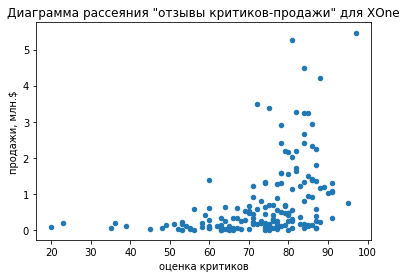

Коэфф.корр. между отзывами критиков и продажами: 0.41699832800840175


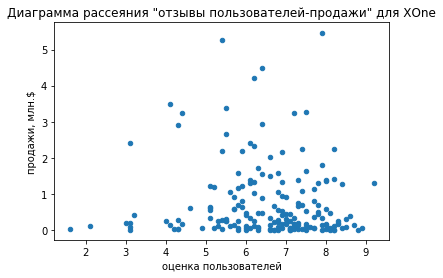

Коэфф.корр. между отзывами пользователей и продажами: -0.06892505328279412


In [41]:
#Диаграмма рассеяния "отзывы критиков-продажи" для XOne
df_games_XOne.plot(x='critic_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния "отзывы критиков-продажи" для XOne')
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн.$')
plt.show()
print('Коэфф.корр. между отзывами критиков и продажами:', df_games_XOne['sales'].corr(df_games_XOne['critic_score']))

#Диаграмма рассеяния "отзывы пользователей-продажи" для XOne
df_games_XOne.plot(x='user_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния "отзывы пользователей-продажи" для XOne')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн.$')
plt.show()
print('Коэфф.корр. между отзывами пользователей и продажами:', df_games_XOne['sales'].corr(df_games_XOne['user_score']))

Результаты похожи на PS4.

In [42]:
#Выборка для 3DS
df_games_3DS=df_games[df_games['platform']=='3DS']

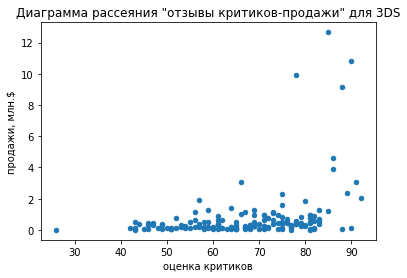

Коэфф.корр. между отзывами критиков и продажами: 0.34873973059848346


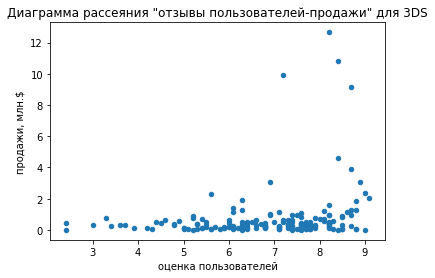

Коэфф.корр. между отзывами пользователей и продажами: 0.22207843643390884


In [43]:
#Диаграмма рассеяния "отзывы критиков-продажи" для 3DS
df_games_3DS.plot(x='critic_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния "отзывы критиков-продажи" для 3DS')
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн.$')
plt.show()
print('Коэфф.корр. между отзывами критиков и продажами:', df_games_3DS['sales'].corr(df_games_3DS['critic_score']))

#Диаграмма рассеяния "отзывы пользователей-продажи" для 3DS
df_games_3DS.plot(x='user_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния "отзывы пользователей-продажи" для 3DS')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн.$')
plt.show()
print('Коэфф.корр. между отзывами пользователей и продажами:', df_games_3DS['sales'].corr(df_games_3DS['user_score']))

Корреляция между продажами и отзывами критиков немного снизилась, а вот между продажами и отзывами пользователей значительно увеличилась.

Теперь посмотрим, какие же будут результаты для всх платформ в общем.

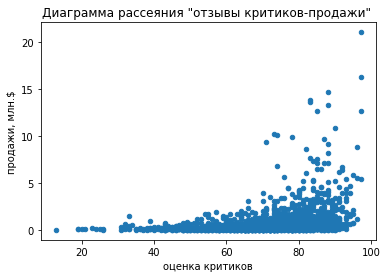

Коэфф.корр. между отзывами критиков и продажами: 0.3299765050114585


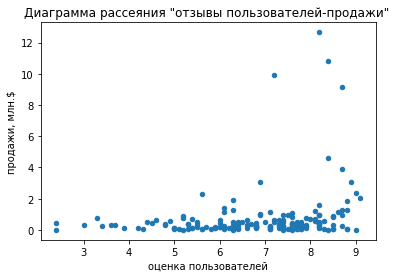

Коэфф.корр. между отзывами пользователей и продажами: 0.03163612772559288


In [44]:
#Диаграмма рассеяния "отзывы критиков-продажи" 
df_games.plot(x='critic_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния "отзывы критиков-продажи" ')
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн.$')
plt.show()
print('Коэфф.корр. между отзывами критиков и продажами:', df_games['sales'].corr(df_games['critic_score']))

#Диаграмма рассеяния "отзывы пользователей-продажи" 
df_games_3DS.plot(x='user_score', y='sales', kind='scatter')
plt.title('Диаграмма рассеяния "отзывы пользователей-продажи" ')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн.$')
plt.show()
print('Коэфф.корр. между отзывами пользователей и продажами:', df_games['sales'].corr(df_games['user_score']))

Для всей выборки хуже прослеживается зависимость между продажами и оценками критиков, чем для самых популярных платформ. Все же она равна 0.3. Похоже, что зависимость есть. Корреляция между отзывами пользователей и продажами все еще мала.

### Распределение игр по жанрам

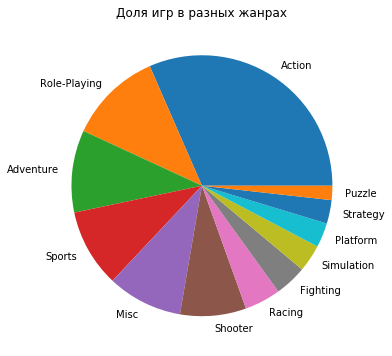

In [45]:
#Круговая диаграмма "Доля игр в разных жанрах"
games_genre=df_games.groupby('genre')['sales'].count().sort_values(ascending=False)
games_genre.plot(figsize=(6,6), style='o-', grid=True, kind='pie')
plt.title('Доля игр в разных жанрах')
plt.xlabel('')
plt.ylabel('')
plt.show()

Больше всего игр было выпущено в жанрах Action, Role-Playing, Adventure, Sports,Misc соответственно по возрастанию.

### Распределение продаж по жанрам

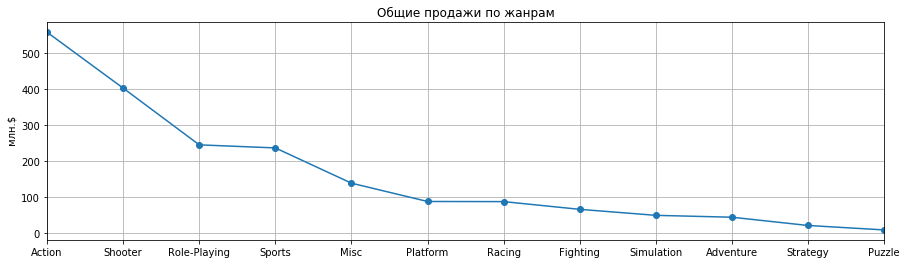

In [46]:
#График 'Общие продажи по жанрам'
games_genre=df_games.groupby('genre')['sales'].sum().sort_values(ascending=False)
games_genre.plot(figsize=(15,4), style='o-', grid=True)
plt.xticks(np.arange(len(games_genre)), games_genre.index)
plt.title('Общие продажи по жанрам')
plt.xlabel('')
plt.ylabel(' млн.$')
plt.show()

По сумме продаж лидирующие места занимают те же самые жанры, кроме Adventure. Однако, нужно проверить насколько много в среднем собирает каждая отдельная игра в этих жанрах.

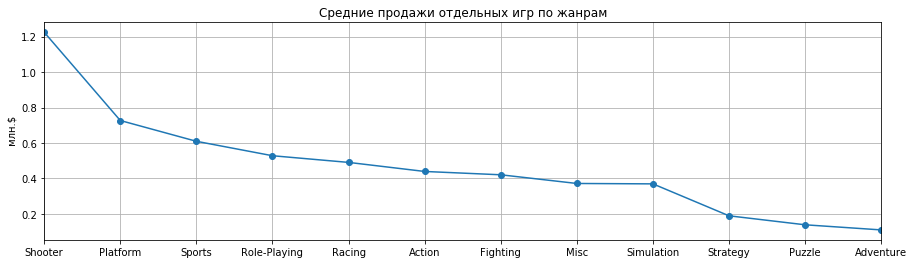

In [47]:
#График 'Средние продажи отдельных игр по жанрам'
games_genre=df_games.groupby('genre')['sales'].mean().sort_values(ascending=False)
games_genre.plot(figsize=(15,4), style='o-', grid=True)
plt.xticks(np.arange(len(games_genre)), games_genre.index)
plt.title('Средние продажи отдельных игр по жанрам')
plt.xlabel('')
plt.ylabel(' млн.$')
plt.show()

Здесь мы видим уже другие результаты. Самая высокая средняя оценка у игр Shooter (более 1.2 млн.), на втором месте Platform, далее идет плавное снижение по остальным жанрам.  

Всё так, но не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 


## 4. Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

Посмотрим, отличаются ли самые популярные платформы для разных регионов. 

In [48]:
#Продажи разных платформ отдельно по регионам
region_platform = df_games.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False)

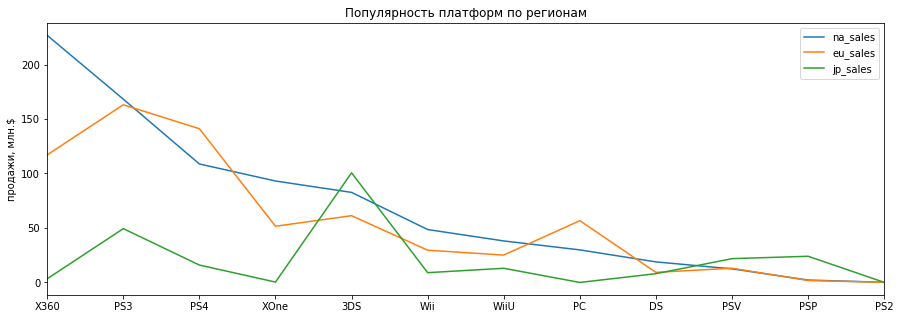

In [49]:
#График 'Популярность платформ по регионам'
region_platform.plot(figsize=(15,5))
plt.xticks(np.arange(len(region_platform)), region_platform.index)
plt.title('Популярность платформ по регионам')
plt.xlabel('')
plt.ylabel('продажи, млн.$')
plt.show()

Оказывается в разных регионах совсем разные фавориты. Получается, что в тройку лидеров по всей выборке платформы попадали за счет пользователей разных стран не равномерно: X360 - Америка, PS3 - Европа, 3DS - Япония. 

Значит, анализировать данные для всех стран одновременно не совсем корректно, для людей разных культур будут различные результаты. 

In [50]:
print('Топ-5 платформ Америки', list(region_platform.sort_values(by='na_sales', ascending=False).head(5).index))
print('Топ-5 платформ Европы', list(region_platform.sort_values(by='eu_sales', ascending=False).head(5).index))
print('Топ-5 платформ Японии', list(region_platform.sort_values(by='jp_sales', ascending=False).head(5).index))

Топ-5 платформ Америки ['X360', 'PS3', 'PS4', 'XOne', '3DS']
Топ-5 платформ Европы ['PS3', 'PS4', 'X360', '3DS', 'PC']
Топ-5 платформ Японии ['3DS', 'PS3', 'PSP', 'PSV', 'PS4']


### Самые популярные жанры (топ 5)

In [51]:
#Продажи в разных жанрах отдельно по регионам
region_genre = df_games.groupby('genre').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False)

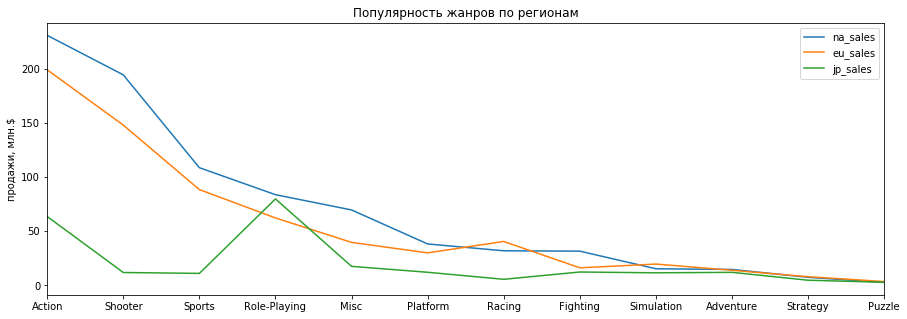

In [52]:
#График 'Популярность жанров по регионам'
region_genre.plot(figsize=(15,5))
plt.xticks(np.arange(len(region_genre)), region_genre.index)
plt.title('Популярность жанров по регионам')
plt.xlabel('')
plt.ylabel('продажи, млн.$')
plt.show()

В Америке и Европе  предпочтения по жанрам совпадают. В Японии результаты отличаются.

In [53]:
print('Топ-5 жанров Америки', list(region_genre.sort_values(by='na_sales', ascending=False).head(5).index))
print('Топ-5 жанров Европы', list(region_genre.sort_values(by='eu_sales', ascending=False).head(5).index))
print('Топ-5 жанров Японии', list(region_genre.sort_values(by='jp_sales', ascending=False).head(5).index))

Топ-5 жанров Америки ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
Топ-5 жанров Европы ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
Топ-5 жанров Японии ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Platform']


Это еще раз подтверждает наше предположение о том, что при сборе данных и дальнейшем анализе важно учитывать различия в культуре людей.

В Америке и Европе ценности и предпочтения людей более схожи, чем с восточной культурой.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [54]:
#Продажи в зависимости от рейтинга ESRB в разных регионах
region_ESRB = df_games.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False)
region_ESRB

,na_sales,eu_sales,jp_sales
rating,,,
M,308.45,250.26,26.14
E,170.17,141.73,36.68
E10+,117.72,78.00,11.23
T,109.31,83.16,33.39


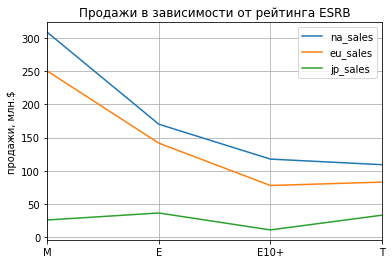

In [55]:
#График 'Продажи в зависимости от рейтинга ESRB'
region_ESRB.plot(grid=True)
plt.xticks(np.arange(len(region_ESRB)), region_ESRB.index)
plt.title('Продажи в зависимости от рейтинга ESRB')
plt.xlabel('')
plt.ylabel('продажи, млн.$')
plt.show()

И снова видим, что в Америке и Европе тенденции схожие. Лидирующую позицию по продажам занимают игры для взрослых. Самые низкие сборы у игр 10+. Разница между двумя этими категориями почти в 3 раза. 

В Япониии самые большие сборы у игр для всех. А игры для взрослых занимают даже не второе, а предпоследнее место (игры для подростков их опережают)! Последнее место так же занимают игры 10+. Самые большие и самые низкие сборы по рейтингу отличаются в 3 раза.

Портрет типичного пользователя каждого из регионов получен.

## 5. Проверка гипотез

    Н0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Н1:Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [56]:
#Отдельные выборки для разных платформ
XOne_userscore = df_games['user_score'][df_games['platform']=='XOne'].dropna()
PC_userscore = df_games['user_score'][df_games['platform']=='PC'].dropna()

In [57]:
#Описательная статистика
XOne_userscore.describe()
XOne_userscore

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [58]:
#Описательная статистика
PC_userscore.describe()

count    307.000000
mean       6.451792
std        1.611303
min        1.400000
25%        5.550000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

   - XOne - 182 наблюдения
   - PC - 307 наблюдений
   
    Средние значения в выборках близки (6.5).

In [59]:
#Тест на проверку нулевой гипотезы
from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(
    XOne_userscore, 
    PC_userscore)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Для выбранного уровня значимости не отвергаем нулевую гипотезу. Вывод — нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC отличаются.

### Проверка гипотез

    H0:Средние пользовательские рейтинги жанров Action и Sports одинаковые.
    H1:Средние пользовательские рейтинги жанров Action и Sports разные.

In [60]:
#Отдельные выборки для разных жанров
Action_userscore = df_games['user_score'][df_games['genre']=='Action'].dropna()
Sports_userscore = df_games['user_score'][df_games['genre']=='Sports'].dropna()

In [61]:
#Описательная статистика
Action_userscore.describe()

count    664.000000
mean       6.775904
std        1.346060
min        1.600000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [62]:
#Описательная статистика
Sports_userscore.describe()

count    246.000000
mean       5.650813
std        1.697795
min        0.200000
25%        4.400000
50%        6.000000
75%        6.900000
max        8.800000
Name: user_score, dtype: float64

   - Action - 664 наблюдения, среднее значение ближе к 7.
   - Sports - 246 наблюдений, среднее значение ближе к 6.

In [63]:
#Тест на проверку гипотезы
from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(
    Action_userscore, 
    Sports_userscore)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


Для выбранного уровня значимости отвергаем нулевую гипотезу. Вывод — средние пользовательские рейтинги жанров Action и Sports отличаются.

## 6. Выводы

Для анализа был загружен файл с 16715 наблюдений, 11 переменными. Основными причинами пропусков в данных были устаревшие данные и отсутствие отзывов к играм. Ошибки были устранены. Добавлена информация о суммарных продажах. 

Были проанализированы масштабы выпуска в разные периоды времени. Обнаружено, что до 1995 года данных крайне мало, а самое большое количество игр представлено в 2008-2009 годах. По последним данным тренд сейчас убывающий.

Была представлена популярность игровых платформ в зависимости от года. Обнаружено, что жизненный цикл платформ до 10 лет, а самые популярные сменяют друг друга примерно каждые 5 лет.

Далее были отфильтрованы данные после 2010 года, более старые были отброшены. 

Были определены 10 самых продаваемых платформ за последние 5 лет. Из них были выделены три самые перспективные -  PS4, XOne, 3DS. С помощью графиков были проанализированы различия в продажах на разных платформах.

Проведен анализ влияния отзывов на продажи внутри самых популярных платформ и для всей выборки. Сделаны выводы, что отзывы критиков коррелируют с продажами. Явной зависимости между отзывами пользователей и продажами не обнаружено.

Представлены самые популярные жанры (Action, Role-Playing, Adventure, Sports,Misc соответственно по возрастанию) и средние продажи отдельной игры в них. Было обнаружено, что самые популярные жанры и жанры с самым высоким средним значением сборов по игре (Shooter, Platform) не совпали. 

Был сконструирован портрет пользователя для трех разных регионов. Предпочтения людей по самым популярным платформам и жанрам в разных регионах не совпали. Получается, что в тройку лидеров по всей выборке платформы попадали за счет пользователей разных стран не равномерно: X360 - Америка, PS3 - Европа, 3DS - Япония. Что касается жанров, для Европы и Америки самым популярным оказался Action, для Японии - Role-Playing. Было выявлено влияние рейтинга ESRB на продажи, но характер влияния зависил от конкретного региона. В Европе и Америке самыми продаваемыми оказались игры для взрослых, в Японии - игры для всех.

Были сделаны выводы, что в разных регионах предпочтения людей отличаются. В регионах с более схожими культурами, в Америке и Европе, различий меньше, чем, например у таких стран с Японией. 

Было сформулировано несколько гипотез о различии пользовательских рейтингов на разных платформах и в разных жанрах. По результатам тестов, нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC отличаются. Второй тест показал, что средние пользовательские рейтинги жанров Action и Sports отличаются.